In [1]:
import mne
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np

In [2]:
data_path = '/home/kfsh/data/'
subj = 'OP0008'
file_path = data_path + 'eeg/%s/%s_B1/%s_B1_downsampled_with_annotations.fif' % (subj,subj,subj)
raw = mne.io.read_raw_fif(file_path,preload=True,verbose=False)
s2 = 'OP0009'
f2 = data_path + 'eeg/%s/%s_B1/%s_B1_downsampled_with_annotations.fif' % (s2,s2,s2)
r2 = mne.io.read_raw_fif(f2,preload=True,verbose=False)
sfreq = raw.info['sfreq']
s3 = 'OP0013'
f3 = data_path + 'eeg/%s/%s_B1/%s_B1_downsampled_with_annotations.fif' % (s3,s3,s3)
r3 = mne.io.read_raw_fif(f3,preload=True,verbose=False)

<ipython-input-2-5c7e56d2b384>:4: RuntimeWarning: This filename (/home/kfsh/data/eeg/OP0008/OP0008_B1/OP0008_B1_downsampled_with_annotations.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(file_path,preload=True,verbose=False)
<ipython-input-2-5c7e56d2b384>:7: RuntimeWarning: This filename (/home/kfsh/data/eeg/OP0009/OP0009_B1/OP0009_B1_downsampled_with_annotations.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  r2 = mne.io.read_raw_fif(f2,preload=True,verbose=False)
<ipython-input-2-5c7e56d2b384>:11: RuntimeWarning: This filename (/home/kfsh/data/eeg/OP0013/OP0013_B1/OP0013_B1_downsampled_with_annotations.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.

## A: vEOG

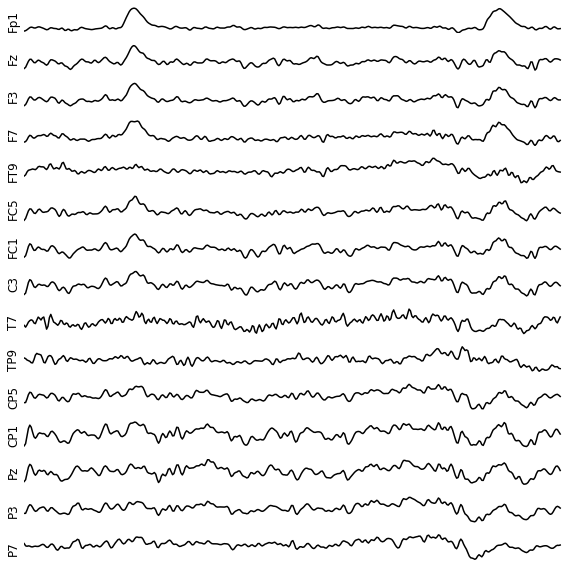

In [3]:
tmin,tmax = 2220,2223
tmin,tmax = tmin*128,tmax*128
resp = r2.get_data(picks=r2.info['ch_names'][:15],start=tmin, stop=tmax)
fig, ax = plt.subplots(nrows=15,ncols=1,sharex=False,sharey=True,figsize=(8,8))
for i,ch in enumerate(resp):
    plt.subplot(15,1,i+1)
    plt.plot(ch,color='k')
    plt.gca().set_ylim([ch.min()*1.1,ch.max()*1.1])
    plt.gca().set_xlim([0,tmax-tmin])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.box(False)
    plt.ylabel(r2.info['ch_names'][i],fontsize='large')
plt.tight_layout();
fig.savefig('./pdf/veog.pdf')

## B: hEOG

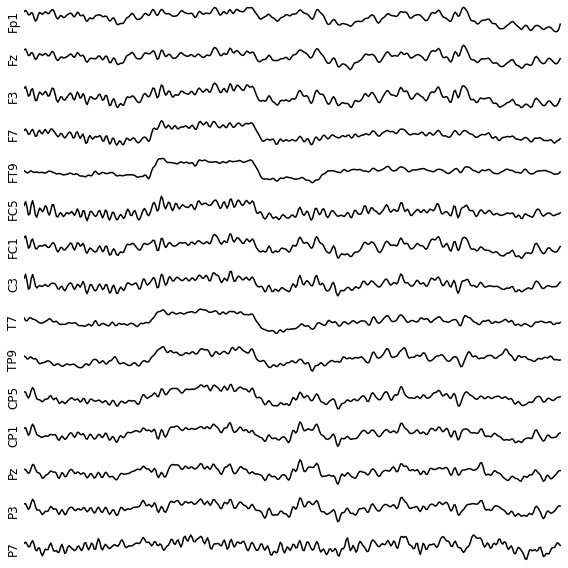

In [4]:
tmin,tmax = 2178,2181
tmin,tmax = tmin*128,tmax*128
resp = raw.get_data(picks=r2.info['ch_names'][:15],start=tmin, stop=tmax)
fig, ax = plt.subplots(nrows=15,ncols=1,sharex=False,sharey=True,figsize=(8,8))
for i,ch in enumerate(resp):
    plt.subplot(15,1,i+1)
    plt.plot(ch,color='k')
    plt.gca().set_ylim([ch.min()*1.1,ch.max()*1.1])
    plt.gca().set_xlim([0,tmax-tmin])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.box(False)
    plt.ylabel(r2.info['ch_names'][i],fontsize='large')
plt.tight_layout();
fig.savefig('./pdf/heog.pdf')

## C: EKG

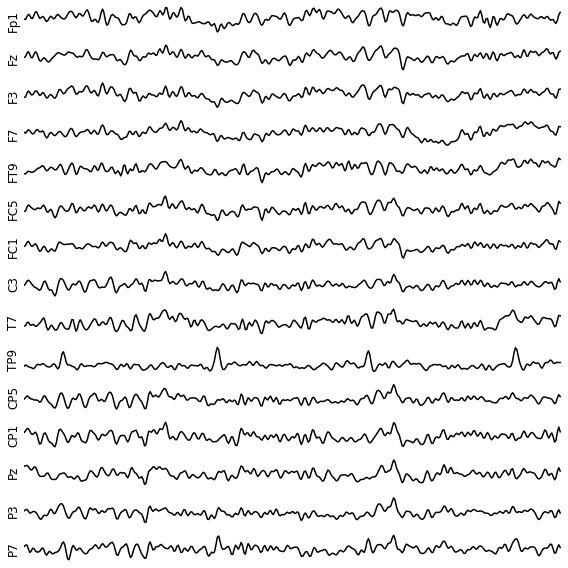

In [5]:
tmin,tmax = 872,875
tmin,tmax = tmin*128,tmax*128
resp = r3.get_data(picks=r2.info['ch_names'][:15],start=tmin, stop=tmax)
fig, ax = plt.subplots(nrows=15,ncols=1,sharex=False,sharey=True,figsize=(8,8))
for i,ch in enumerate(resp):
    plt.subplot(15,1,i+1)
    plt.plot(ch,color='k')
    plt.gca().set_ylim([ch.min()*1.1,ch.max()*1.1])
    plt.gca().set_xlim([0,tmax-tmin])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.box(False)
    plt.ylabel(r2.info['ch_names'][i],fontsize='large')
plt.tight_layout();
fig.savefig('./pdf/ekg.pdf')

## D: EMG

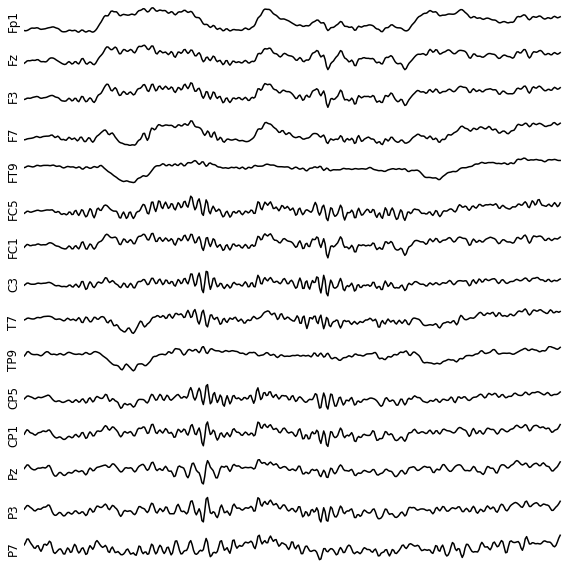

In [6]:
# fig = raw.plot(start=2185,n_channels=15,duration=5)
# fig.savefig('../pdf/1_1_d.pdf')

tmin,tmax = 2185,2188
tmin,tmax = tmin*128,tmax*128
resp = raw.get_data(picks=r2.info['ch_names'][:15],start=tmin, stop=tmax)
fig, ax = plt.subplots(nrows=15,ncols=1,sharex=False,sharey=True,figsize=(8,8))
for i,ch in enumerate(resp):
    plt.subplot(15,1,i+1)
    plt.plot(ch,color='k')
    plt.gca().set_ylim([ch.min()*1.1,ch.max()*1.1])
    plt.gca().set_xlim([0,tmax-tmin])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.box(False)
    plt.ylabel(r2.info['ch_names'][i],fontsize='large')
plt.tight_layout();
fig.savefig('./pdf/emg.pdf')

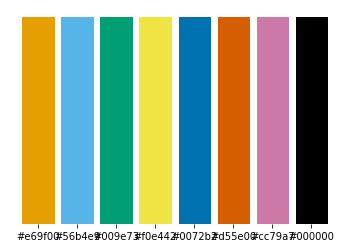

In [7]:
from gkTools.plotting import colors
palette = colors.okabe_ito(print_swatch=True)
veog = palette[4]
heog = palette[6]
ekg = palette[2]
emg = palette[5]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


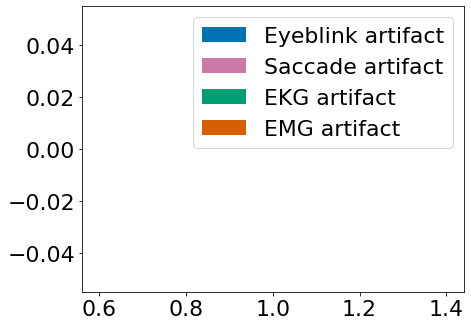

In [8]:
font = {'family':'normal',
        'weight':'regular',
        'size':22}
rc('font', **font)
# separate legend
fig = plt.figure(figsize=(7,5))
plt.bar(1,0,color=veog);
plt.bar(1,0,color=heog);
plt.bar(1,0,color=ekg);
plt.bar(1,0,color=emg);
plt.legend(['Eyeblink artifact','Saccade artifact','EKG artifact','EMG artifact'])
plt.tight_layout()
plt.savefig('./pdf/artifacts_legend.pdf')